In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import utils as ut
import LogCatParsing
import statParser as sp
import SysInfoParsing as sysP
from colour import Color
import os

In [16]:
separateCols = "GameServer Opencraft.Terrain.TerrainGenerationSystem;GameServer Opencraft.Terrain.TerrainToSpawn;GameServer Opencraft.Terrain.TerrainStructuresSystem;terrainMeshingSys;GameClient Opencraft.Player.PlayerMovementSystem;GameServer Opencraft.Player.PlayerMovementSystem;ServerFixedUpdate;SetAreaNeighborsJob (Burst);SetAreaNeighborsJob;GhostUpdateSystem:UpdateJob (Burst);GhostUpdateJobCustom;GhostUpdateSystem:UpdateJob;Idle;OculusRuntime.WaitToBeginFrame;GameClient Unity.Entities.SimulationSystemGroup;"
print(separateCols.split(";"))

['GameServer Opencraft.Terrain.TerrainGenerationSystem', 'GameServer Opencraft.Terrain.TerrainToSpawn', 'GameServer Opencraft.Terrain.TerrainStructuresSystem', 'terrainMeshingSys', 'GameClient Opencraft.Player.PlayerMovementSystem', 'GameServer Opencraft.Player.PlayerMovementSystem', 'ServerFixedUpdate', 'SetAreaNeighborsJob (Burst)', 'SetAreaNeighborsJob', 'GhostUpdateSystem:UpdateJob (Burst)', 'GhostUpdateJobCustom', 'GhostUpdateSystem:UpdateJob', 'Idle', 'OculusRuntime.WaitToBeginFrame', 'GameClient Unity.Entities.SimulationSystemGroup', '']


In [17]:
dataPath = "C:/Users/joach\Desktop/measuring-the-metaverse/measurements"
experimentSet = {}
for exp in os.listdir(dataPath):
    try:
        datapPaths, datapNames = ut.getSubdirs(os.path.join(dataPath, exp))
        statSets = []
        
        statisticSets = []
        procSet = []
        ftSet = []
        listOfNsCols = ['Main Thread',
                        'PlayerLoop',
                        'GameServer Opencraft.Terrain.TerrainGenerationSystem',
                        'GameServer Opencraft.Terrain.TerrainToSpawn',
                        'GameServer Opencraft.Terrain.TerrainStructuresSystem',
                        'terrainMeshingSys', 'GameClient Opencraft.Player.PlayerMovementSystem', 
                        'GameServer Opencraft.Player.PlayerMovementSystem', 
                        'ServerFixedUpdate', 'SetAreaNeighborsJob (Burst)', 
                        'SetAreaNeighborsJob', 
                        'GhostUpdateSystem:UpdateJob (Burst)', 
                        'GhostUpdateJobCustom', 
                        'GhostUpdateSystem:UpdateJob', 
                        'Idle', 
                        'OculusRuntime.WaitToBeginFrame', 
                        'GameClient Unity.Entities.SimulationSystemGroup']

        for datapIdx in range(0, len(datapPaths)):

            datapName = datapNames[datapIdx]
            datapPath = datapPaths[datapIdx]
            statSets.append(sp.getCpuData(f"{datapPath}/stat_{datapName}.log"))
            statisticSet = LogCatParsing.StatsFile(datapPath + f"/logcat_VrApi_{datapName}.log").dataFrame

            tmpListOfNsCols = list(filter(lambda x: x in statisticSet.columns, listOfNsCols))

            statisticSet[tmpListOfNsCols] = statisticSet[tmpListOfNsCols].apply(lambda x: (x * 1e-9)/1e-3)

            statisticSets.append(statisticSet[300:])
            
            ftSet.append({f"": statisticSets[-1]['Main Thread']})
            # ftSet.append({f"": list(map(lambda x: (x * 1e-9)/1e-3, statisticSets[-1].dataFrame['GameServer Opencraft.Terrain.TerrainGenerationSystem']))})
            
            memInfoPath = f"{datapPath}/meminfo_{datapName}.log"
            netDevPath = f"{datapPath}/net_dev_{datapName}.log"
            statPath = f"{datapPath}/stat_{datapName}.log"
            procSet.append(sysP.SysInfo(memInfoPath, netDevPath, statPath))
            
        experimentSet.update({exp:(ftSet,statSets,datapNames,statisticSets, procSet)})
    except Exception as e:
        print(f"{exp} failed with error {e}")

C:/Users/joach\Desktop/measuring-the-metaverse/measurements\mulRD/HMD-M-T-rd-9/logcat_VrApi_HMD-M-T-rd-9.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\mulRD/HMD-S-T-rd-09/logcat_VrApi_HMD-S-T-rd-09.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\platfCmp/MQ2-18/logcat_VrApi_MQ2-18.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\platfCmp/MQ3-18/logcat_VrApi_MQ3-18.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\platfCmp/MQP-18/logcat_VrApi_MQP-18.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\platfCmp/PC-18/logcat_VrApi_PC-18.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\RD/HMD-S-T-rd-03/logcat_VrApi_HMD-S-T-rd-03.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\RD/HMD-S-T-rd-04/logcat_VrApi_HMD-S-T-rd-04.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurements\RD/HMD-S-T-rd-05/logcat_VrApi_HMD-S-T-rd-05.log
C:/Users/joach\Desktop/measuring-the-metaverse/measurement

In [18]:
def cpuData(experimentSet, exp):
    ftSet, statSets, datapNames, statisticSets, procSet = experimentSet[exp]
    #fig, axes = plt.subplots(nrows=len(statSets), ncols = 1)

    for i in range(0, len(statSets)):
        statSets[i].plot(figsize=(4,1.5))
        plt.ylim(0,100)
        plt.xlim(0,150)
        plt.title(f"cpu usage of platform {datapNames[i]}")
        plt.xlabel("time in seconds")
        plt.ylabel("cpu usage (%)")
        plt.show()

                
300    11.799479
301    13.875781
302    15.097031
303    14.226562
304    12.621719
...          ...
10198  14.380885
10199  13.787553
10200  15.017604
10201  13.435989
10202  10.649740

[9903 rows x 1 columns]


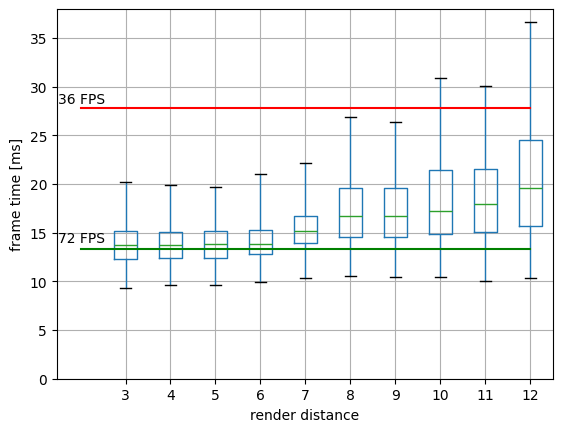

In [19]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

print(pd.DataFrame( rdStSet[0]))

frames = list(map(lambda x: pd.DataFrame(x), rdStSet))
ftFrame = ut.mergeListAsym(frames, list(map(str,[3,4,5,6,7,8,9,10,11,12])))
ftFrame.boxplot(showfliers=False, whis=[1,99])

plt.plot([0,len(ftFrame.columns)],[13.33,13.33], color='green')
plt.annotate("72 FPS", xy=[0,13.33], xytext=[-0.5,14])
plt.plot([0,len(ftFrame.columns)],[27.77,27.77], color='red')
plt.annotate("36 FPS", xy=[0,27.77], xytext=[-0.5,28.3])

plt.ylabel("frame time [ms]")
plt.xlabel("render distance")

plt.ylim(bottom=0)

plt.savefig("rdBoxes.png", format="png", bbox_inches="tight")
plt.show()
# plt.yscale("log")

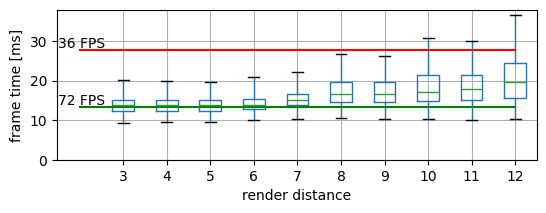

In [42]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

# print(frames[0])
ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])
# print(ftFrame)

ax = ftFrame.boxplot(by='render distance',column='Main Thread', showfliers=False,whis=[1,99], figsize=(6,2))
plt.title("")
plt.plot([0,len(datapNames)],[13.33,13.33], color='green')
plt.annotate("72 FPS", xy=[0,13.33], xytext=[-0.5,14])
plt.plot([0,len(datapNames)],[27.77,27.77], color='red')
plt.annotate("36 FPS", xy=[0,27.77], xytext=[-0.5,28.3])

plt.suptitle("")

plt.ylabel("frame time [ms]")
plt.xlabel("render distance")

plt.ylim(bottom=0)
plt.savefig("rdBoxes.png", format="png", bbox_inches="tight")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.show()
# plt.yscale("log")

## Presentation plot

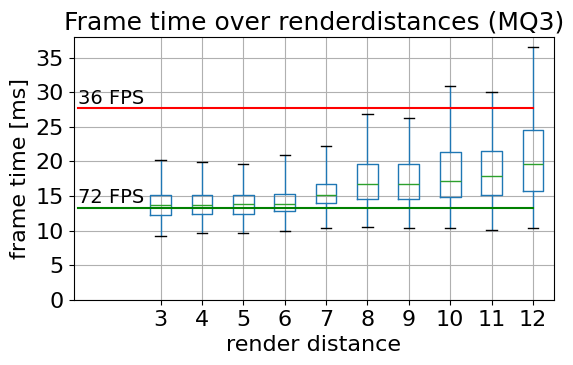

In [21]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

# print(frames[0])
ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])
# print(ftFrame)

textXpos = -1

ftFrame.boxplot(by='render distance',column='Main Thread', showfliers=False,whis=[1,99], figsize=(6,3.5))
plt.title("Frame time over renderdistances (MQ3)", size=18)
plt.plot([textXpos,len(datapNames)],[13.33,13.33], color='green')
plt.annotate("72 FPS", xy=[-.5,13.33], xytext=[textXpos,14],size=14)
plt.plot([textXpos,len(datapNames)],[27.77,27.77], color='red')
plt.annotate("36 FPS", xy=[0,27.77], xytext=[textXpos,28.3],size=14)

plt.suptitle("")

plt.ylabel("frame time [ms]",size=16)
plt.xlabel("render distance",size=16)
plt.xlim((textXpos -.1, plt.xlim()[1]))

plt.xticks(size=16)
plt.yticks(size=16)

plt.ylim(bottom=0)

plt.savefig("rdBoxesPresentation.png", bbox_inches="tight")
plt.show()
# plt.yscale("log")

## Boxplot for subcomponents

C:\Users\joach\AppData\Local\Temp\ipykernel_10404\527988594.py:18: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  axs = ftFrame.boxplot(by="render distance", ax = axs,


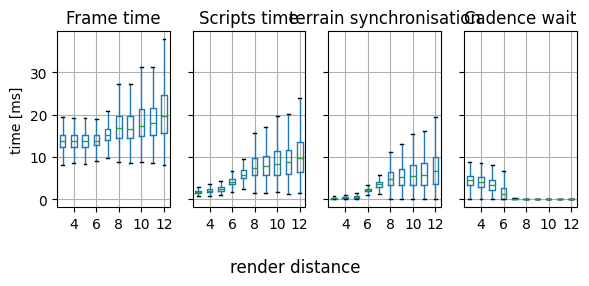

In [22]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])

totalName = "terrainBuilderTotal"
totalList = ['GameServer Opencraft.Terrain.TerrainGenerationSystem',
             'terrainMeshingSys',
             'GameServer Opencraft.Terrain.TerrainToSpawn',
             'GameServer Opencraft.Terrain.TerrainStructuresSystem',
             "GhostUpdateJobCustom"]
ftFrame[totalName] = sum(list(map(lambda x: ftFrame[x], totalList)))

fig, axs = plt.subplots(1,4, sharey=True)
fig.set_figwidth(6)
fig.set_figheight(3)
fig.set_tight_layout(True)

axs = ftFrame.boxplot(by="render distance", ax = axs,
                      column=['Main Thread', "GameClient Unity.Entities.SimulationSystemGroup", "GhostUpdateJobCustom", "OculusRuntime.WaitToBeginFrame"], 
                      showfliers = False, sharey=axs)
axs[0].get_figure().supxlabel('render distance')
axs[0].get_figure().suptitle('')

axs[0].title.set_text('Frame time')
axs[1].title.set_text('Scripts time')
axs[2].title.set_text('terrain synchronisation')
axs[3].title.set_text('Cadence wait')

axs[0].set_ylabel('time [ms]')
axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('')

for i in range(0,4):
    axs[i].set_xticks(list(range(2,len(datapNames) + 1, 2)))
    # axs[i].set_xticklabels(axs[i].get_xticklabels(), fontsize=8)


miny, maxy = ut.minmaxY(ftFrame["Main Thread"], 99)
#plt.ylim(0,maxy)

# ftFrame.plot(x='render distance',y='Main Thread')
plt.savefig("rd-multicomponent.png")
plt.show()

rd3 = filter(lambda x : x == 3, ftFrame['render distance'])

## Stackplot for subcomponents 

C:\Users\joach\AppData\Local\Temp\ipykernel_10404\3439275197.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))
C:\Users\joach\AppData\Local\Temp\ipykernel_10404\3439275197.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftlsFrame["otherLoopComponents"] = otherLoopCol


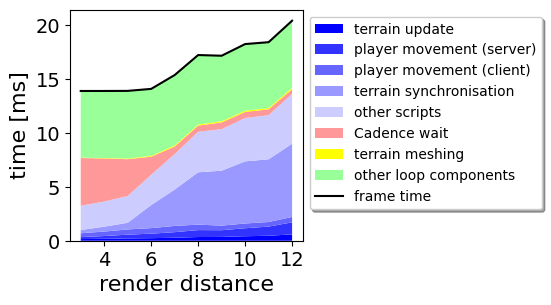

In [23]:
playerLoopMarkers: list[str] = [
    "OculusRuntime.WaitToBeginFrame",
    "terrainMeshingSys"]

SimSysSubComponents = [
    "terrainTime",
    'GameServer Opencraft.Player.PlayerMovementSystem',
    'GameClient Opencraft.Player.PlayerMovementSystem',
    "GhostUpdateJobCustom"
]

ColNameToLegend = {
    'GameServer Opencraft.Terrain.TerrainGenerationSystem': "terrain spawner",
    'GameServer Opencraft.Terrain.TerrainToSpawn': 'terrain area fetcher',
    'GameServer Opencraft.Terrain.TerrainStructuresSystem': 'terrain structure builder',
    'GameServer Opencraft.Player.PlayerMovementSystem': 'player movement (server)',
    'GameClient Opencraft.Player.PlayerMovementSystem': 'player movement (client)',
    "GhostUpdateJobCustom": "terrain synchronisation",
    "OculusRuntime.WaitToBeginFrame": "Cadence wait",
    "terrainMeshingSys": "terrain meshing",
    "Main Thread": "frame time",
    "other scripts": "other scripts",
    "otherLoopComponents": "other loop components",
    "terrainTime": "terrain update"
}

totalList = (SimSysSubComponents) + playerLoopMarkers
playerLoopMarkers.append("ServerFixedUpdate")
playerLoopMarkers.append("GameClient Unity.Entities.SimulationSystemGroup")

rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])
ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))

'''
ftlFrame looks something like this:
render dist;  metric 1; metric 2; ..
 3            mean() ; mean() ...
 4            mean() ; mean() ...
 5            mean() ; mean() ...
'''

# to make the stackplot, I would like to group all script columns and show 
# what areas correspond with a specific system
ftlFrame['terrainTime'] = (ftlFrame["GameServer Opencraft.Terrain.TerrainGenerationSystem"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainToSpawn"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainStructuresSystem"])

ftlsFrame = ftlFrame[totalList]

otherScriptsCol = (ftlFrame['GameClient Unity.Entities.SimulationSystemGroup'] 
                   + ftlFrame["ServerFixedUpdate"]) - ftlsFrame[SimSysSubComponents].sum(axis=1)

otherLoopCol = ftlFrame['Main Thread'] - ftlFrame[playerLoopMarkers].sum(axis = 1)

ftlsFrame.insert(loc=len(SimSysSubComponents), column="other scripts", value=otherScriptsCol)
ftlsFrame["otherLoopComponents"] = otherLoopCol

# generate colors
# the first areas are all from the scripts, so we need:
colors = list(Color(rgb=(0,0,1)).range_to(Color(rgb=(.8,.8,1)), len(SimSysSubComponents) + 1))

colors.append(Color(rgb=(1,.6,.6)))
colors.append(Color("yellow"))
colors.append(Color(rgb=(.6,1,.6)))

plt.figure(figsize=(3,3))
# ftlFrame.plot.area(x='render distance')
plt.stackplot(ftlFrame['render distance'], ftlsFrame.to_numpy().transpose(),
              colors = list(map(lambda x: Color.get_rgb(x), colors)))

plt.plot(ftlFrame['Main Thread'], c = 'black')


cols = list(ftlsFrame.columns)
cols.append('Main Thread')
legend = plt.legend(list(map(lambda x: ColNameToLegend[x], cols)), loc="upper left", bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)


# pd.DataFrame(ftFrame)[['render distance','Main Thread']].boxplot(by='render distance', showfliers=False)
plt.xlabel("render distance",size=16)
plt.ylabel("time [ms]",size=16)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("rd-multi-stack.png", bbox_extra_artists = [legend], bbox_inches='tight')
plt.show()

## Adaptation for presentation

C:\Users\joach\AppData\Local\Temp\ipykernel_10404\808175882.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))
C:\Users\joach\AppData\Local\Temp\ipykernel_10404\808175882.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftlsFrame["otherLoopComponents"] = otherLoopCol


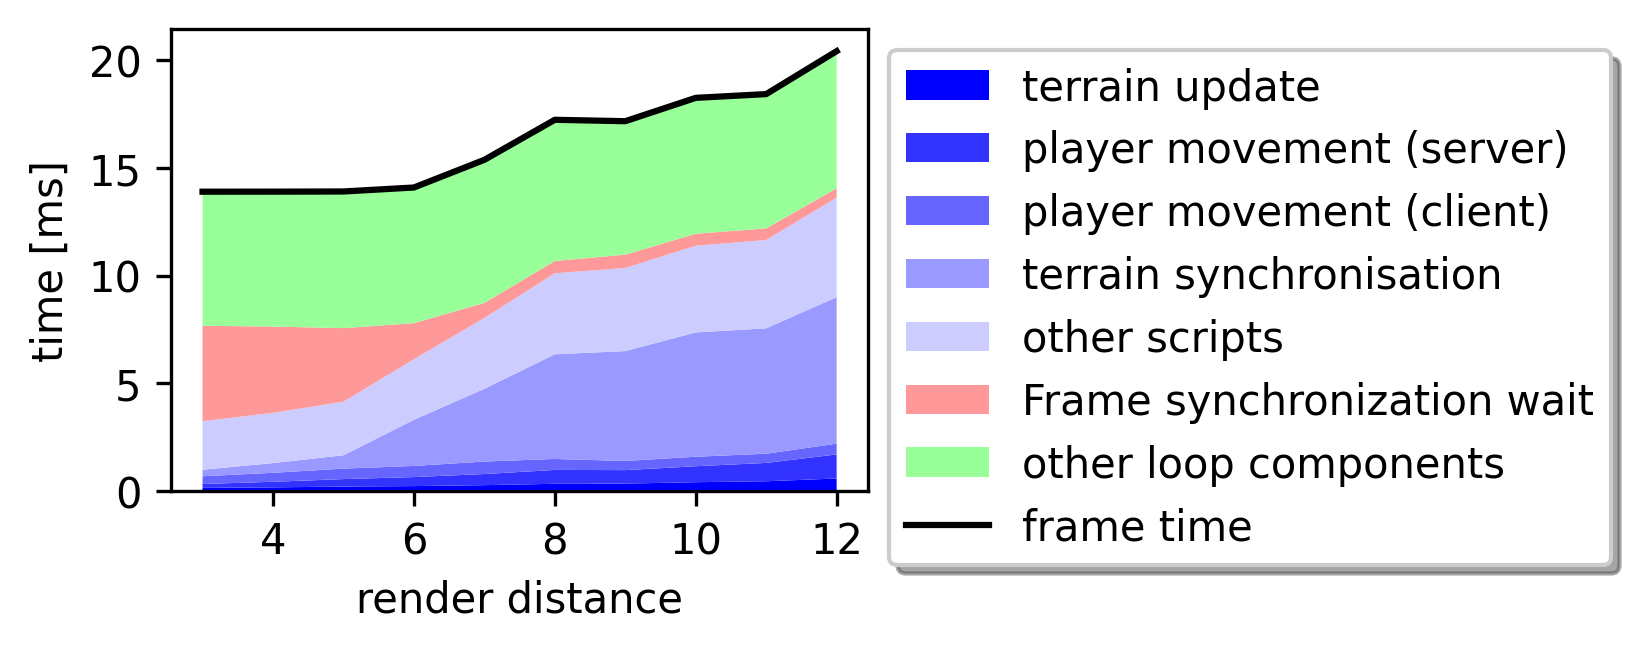

In [44]:
playerLoopMarkers: list[str] = [
    "OculusRuntime.WaitToBeginFrame",
    # "terrainMeshingSys"
    ]

SimSysSubComponents = [
    "terrainTime",
    'GameServer Opencraft.Player.PlayerMovementSystem',
    'GameClient Opencraft.Player.PlayerMovementSystem',
    "GhostUpdateJobCustom"
]

ColNameToLegend = {
    'GameServer Opencraft.Terrain.TerrainGenerationSystem': "terrain spawner",
    'GameServer Opencraft.Terrain.TerrainToSpawn': 'terrain area fetcher',
    'GameServer Opencraft.Terrain.TerrainStructuresSystem': 'terrain structure builder',
    'GameServer Opencraft.Player.PlayerMovementSystem': 'player movement (server)',
    'GameClient Opencraft.Player.PlayerMovementSystem': 'player movement (client)',
    "GhostUpdateJobCustom": "terrain synchronisation",
    "OculusRuntime.WaitToBeginFrame": "Frame synchronization wait",
    "terrainMeshingSys": "terrain meshing",
    "Main Thread": "frame time",
    "other scripts": "other scripts",
    "otherLoopComponents": "other loop components",
    "terrainTime": "terrain update"
}

totalList = (SimSysSubComponents) + playerLoopMarkers
playerLoopMarkers.append("ServerFixedUpdate")
playerLoopMarkers.append("GameClient Unity.Entities.SimulationSystemGroup")

rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])
ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))

'''
ftlFrame looks something like this:
render dist;  metric 1; metric 2; ..
 3            mean() ; mean() ...
 4            mean() ; mean() ...
 5            mean() ; mean() ...
'''

# to make the stackplot, I would like to group all script columns and show 
# what areas correspond with a specific system
ftlFrame['terrainTime'] = (ftlFrame["GameServer Opencraft.Terrain.TerrainGenerationSystem"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainToSpawn"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainStructuresSystem"])

ftlsFrame = ftlFrame[totalList]

otherScriptsCol = (ftlFrame['GameClient Unity.Entities.SimulationSystemGroup'] 
                   + ftlFrame["ServerFixedUpdate"]) - ftlsFrame[SimSysSubComponents].sum(axis=1)

otherLoopCol = ftlFrame['Main Thread'] - ftlFrame[playerLoopMarkers].sum(axis = 1)

ftlsFrame.insert(loc=len(SimSysSubComponents), column="other scripts", value=otherScriptsCol)
ftlsFrame["otherLoopComponents"] = otherLoopCol

# generate colors
# the first areas are all from the scripts, so we need:
colors = list(Color(rgb=(0,0,1)).range_to(Color(rgb=(.8,.8,1)), len(SimSysSubComponents) + 1))

colors.append(Color(rgb=(1,.6,.6)))
# colors.append(Color("yellow"))
colors.append(Color(rgb=(.6,1,.6)))

plt.figure(figsize=(3,2))
# ftlFrame.plot.area(x='render distance')
plt.stackplot(ftlFrame['render distance'], ftlsFrame.to_numpy().transpose(),
              colors = list(map(lambda x: Color.get_rgb(x), colors)))

plt.plot(ftlFrame['Main Thread'], c = 'black')


cols = list(ftlsFrame.columns)
cols.append('Main Thread')
legend = plt.legend(list(map(lambda x: ColNameToLegend[x], cols)), loc="upper left", bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)

# pd.DataFrame(ftFrame)[['render distance','Main Thread']].boxplot(by='render distance', showfliers=False)
plt.xlabel("render distance")
plt.ylabel("time [ms]")
plt.savefig("rd-multi-stack.png", bbox_extra_artists = [legend], bbox_inches='tight')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.show()

In [25]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]
tFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])
ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))

ftlFrame['GhostUpdateJobCustom'].map(lambda x : print(f"{x},"))

0.30111507048369185,
0.45079674564248073,
0.6184517860691473,
2.1394322847600455,
3.3729622107618304,
4.855007695750565,
5.097066793002413,
5.765732328306051,
5.817333499224206,
6.797242336950814,


C:\Users\joach\AppData\Local\Temp\ipykernel_10404\401119905.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ftlFrame = ftFrame.groupby('render distance').apply(lambda x : x.apply(lambda x : x.mean()))


render distance
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
Name: GhostUpdateJobCustom, dtype: object

['GameServer Opencraft.Terrain.TerrainGenerationSystem', 'GameServer Opencraft.Terrain.TerrainToSpawn', 'GameServer Opencraft.Terrain.TerrainStructuresSystem', 'terrainMeshingSys', 'GameClient Opencraft.Player.PlayerMovementSystem', 'GameServer Opencraft.Player.PlayerMovementSystem', 'ServerFixedUpdate', 'GhostUpdateJobCustom', 'Idle', 'OculusRuntime.WaitToBeginFrame', 'GameClient Unity.Entities.SimulationSystemGroup']


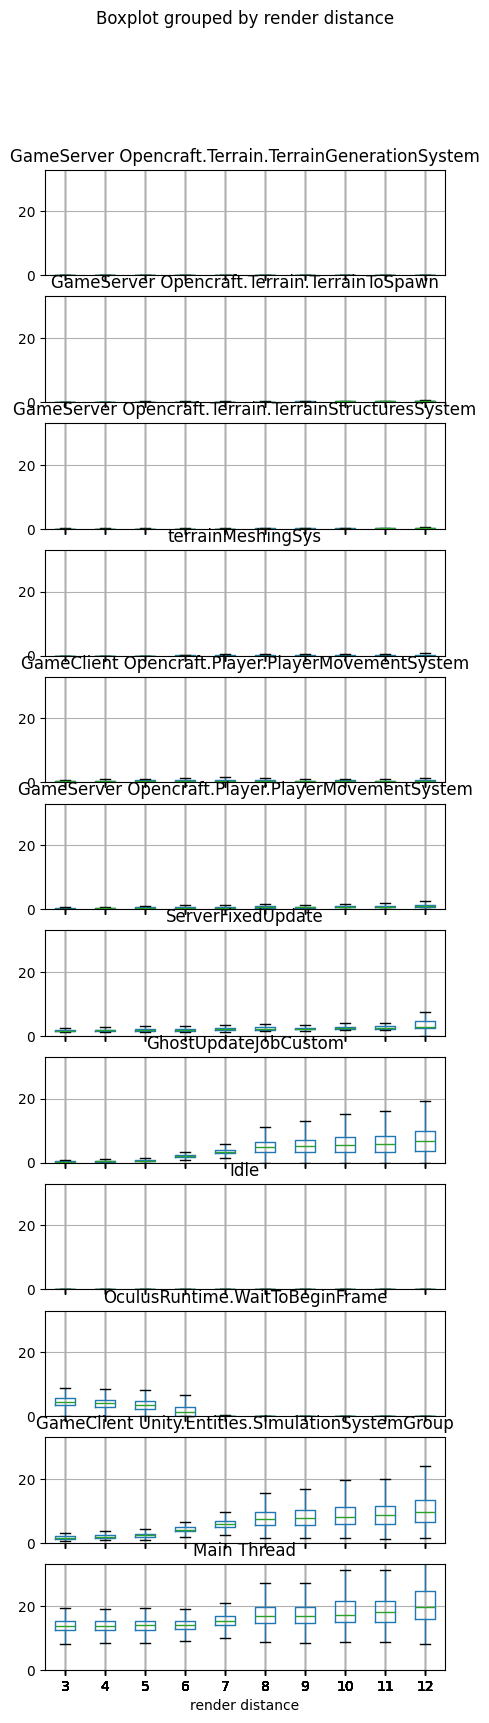

In [26]:
allColList = list(filter(lambda x: x != '', "GameServer Opencraft.Terrain.TerrainGenerationSystem;GameServer Opencraft.Terrain.TerrainToSpawn;GameServer Opencraft.Terrain.TerrainStructuresSystem;terrainMeshingSys;GameClient Opencraft.Player.PlayerMovementSystem;GameServer Opencraft.Player.PlayerMovementSystem;ServerFixedUpdate;GhostUpdateJobCustom;Idle;OculusRuntime.WaitToBeginFrame;GameClient Unity.Entities.SimulationSystemGroup;".split(";")))
print(allColList)
allColList.append("Main Thread")

rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])


ftFrame.boxplot(by="render distance", column=allColList, showfliers = False, layout=(len(allColList),1), figsize=(5,20))
miny, maxy = ut.minmaxY(ftFrame["Main Thread"], 99)
plt.ylim(0,maxy)

# ftFrame.plot(x='render distance',y='Main Thread')
plt.show()


In [27]:
rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["RD"]

ftFrame = ut.concatList(statisticSets, [3,4,5,6,7,8,9,10,11,12])

totalName = "terrainBuilderTotal"
totalList = ['GameServer Opencraft.Terrain.TerrainGenerationSystem',
             'terrainMeshingSys',
             'GameServer Opencraft.Terrain.TerrainToSpawn',
             'GameServer Opencraft.Terrain.TerrainStructuresSystem',
             'GameServer Opencraft.Player.PlayerMovementSystem',
             'GameClient Opencraft.Player.PlayerMovementSystem',
             'Main Thread']

someFrames = list((map(lambda x: f"col: {x} sum: {sum(ftFrame[x])}", totalList)))

ftFrame.to_csv('out.csv')


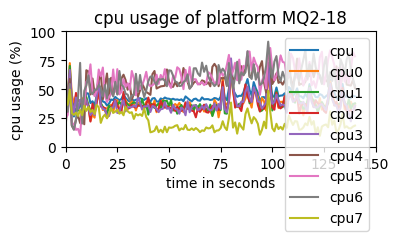

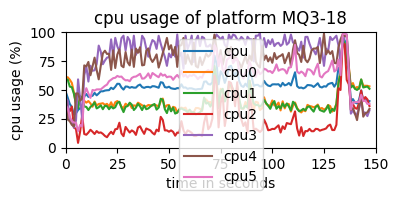

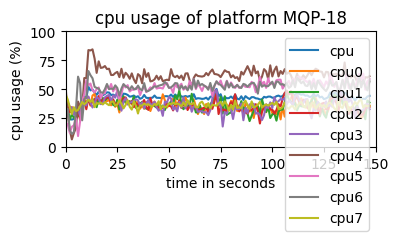

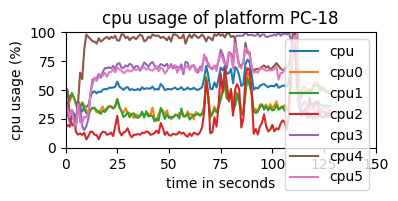

In [28]:
cpuData(experimentSet, "platfCmp")

# the client-server experiment

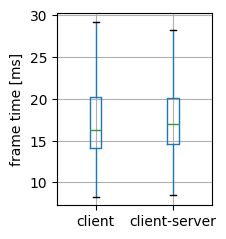

In [29]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet["mulRD"]
# cpuData(experimentSet, "mulRD")
plt.show()

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ftFrame.boxplot(showfliers=False, figsize=(2,2.5))

plt.xticks([1,2],["client","client-server"])

# plt.xlim(0,len(ftSet) + 1)
plt.ylabel("frame time [ms]")
plt.xlabel("")


plt.savefig("cliServ.png", bbox_inches='tight')
plt.show()

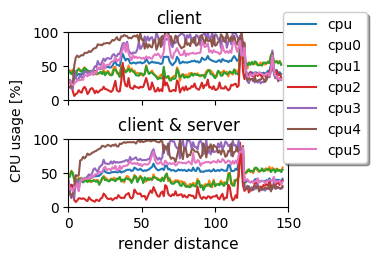

In [30]:

ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']
#fig, axes = plt.subplots(nrows=len(statSets), ncols = 1)

fig, ax = plt.subplots(2, 1, sharex = True, figsize=(3,2.5), layout="constrained")
# fig.tight_layout()
fig.supylabel("CPU usage [%]", size=10)

labels = ["client","client & server"]

for i in range(0, len(statSets)):
    
    statSets[i].plot(ax=ax[i], legend=None)
    ax[i].set_xlabel("render distance", size=11)
    ax[i].set_ylim(0,100)
    ax[i].set_ylabel("")
    plt.xlim(0,150)
    ax[i].set_title(labels[i])
    
# fig.supylabel("CPU usage [%]")
legend = fig.legend(statSets[i].columns, loc="upper left", bbox_to_anchor=(.9, 1),
        ncol=1, fancybox=True, shadow=True)
plt.savefig("CPU-usageMulti.png",bbox_inches="tight")
plt.show()

C:\Users\joach\AppData\Local\Temp\ipykernel_10404\2174406714.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftlsFrame["otherLoopComponents"] = otherLoopCol


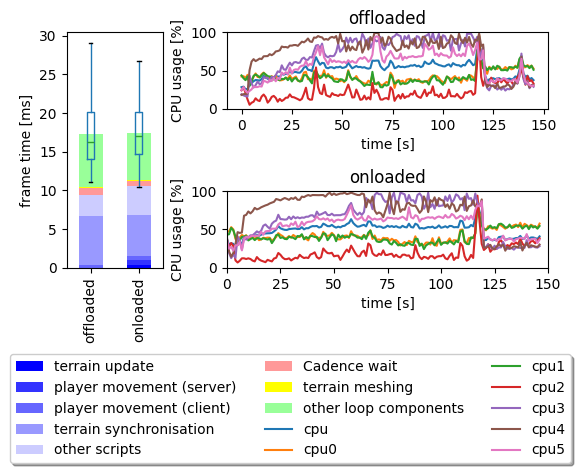

In [31]:
labels = ["offloaded","onloaded"]

playerLoopMarkers: list[str] = [
    "OculusRuntime.WaitToBeginFrame",
    "terrainMeshingSys"]

SimSysSubComponents = [
    "terrainTime",
    'GameServer Opencraft.Player.PlayerMovementSystem',
    'GameClient Opencraft.Player.PlayerMovementSystem',
    "GhostUpdateJobCustom"
]

ColNameToLegend = {
    'GameServer Opencraft.Terrain.TerrainGenerationSystem': "terrain spawner",
    'GameServer Opencraft.Terrain.TerrainToSpawn': 'terrain area fetcher',
    'GameServer Opencraft.Terrain.TerrainStructuresSystem': 'terrain structure builder',
    'GameServer Opencraft.Player.PlayerMovementSystem': 'player movement (server)',
    'GameClient Opencraft.Player.PlayerMovementSystem': 'player movement (client)',
    "GhostUpdateJobCustom": "terrain synchronisation",
    "OculusRuntime.WaitToBeginFrame": "Cadence wait",
    "terrainMeshingSys": "terrain meshing",
    "Main Thread": "frame time",
    "other scripts": "other scripts",
    "otherLoopComponents": "other loop components",
    "terrainTime": "terrain update"
}

totalList = (SimSysSubComponents) + playerLoopMarkers

def makeboxplotOnAx(ax):
    frames = list(map(lambda x: pd.DataFrame(x), ftSet))
    ftFrame = ut.mergeListAsym(frames, datapNames)
    ftFrame.boxplot(showfliers=False, ax=ax)

    ax.set_xticks([1,2],labels)

    plt.xlim(0,len(ftSet) + 1)
    ax.set_ylabel("frame time [ms]")
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.set_xlabel("")
    ax.set_title("")

def makeCpuPlotOnAx(ax, i):
    statSets[i].plot(ax=ax, label=statSets[i].columns, legend=None)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("CPU usage [%]")
    ax.set_ylim(0,100)
    
    plt.xlim(0,150)
    ax.set_title(labels[i])

def makeColors():
    colors = list(Color(rgb=(0,0,1)).range_to(Color(rgb=(.8,.8,1)), len(SimSysSubComponents) + 1))

    colors.append(Color(rgb=(1,.6,.6)))
    colors.append(Color("yellow"))
    colors.append(Color(rgb=(.6,1,.6)))
    return colors

def doColMath(ftlFrame):

    ftlFrame['terrainTime'] = (ftlFrame["GameServer Opencraft.Terrain.TerrainGenerationSystem"] + 
        ftlFrame["GameServer Opencraft.Terrain.TerrainToSpawn"] + 
        ftlFrame["GameServer Opencraft.Terrain.TerrainStructuresSystem"])

    ftlsFrame = ftlFrame[totalList]

    otherScriptsCol = (ftlFrame['GameClient Unity.Entities.SimulationSystemGroup'] 
                    + ftlFrame["ServerFixedUpdate"]) - (ftlFrame[SimSysSubComponents[0]]
                    + ftlFrame[SimSysSubComponents[1]]
                    + ftlFrame[SimSysSubComponents[2]]
                    + ftlFrame[SimSysSubComponents[3]]
                                                        )

    # otherLoopCol = ftlFrame['Main Thread'] - (ftlFrame[playerLoopMarkers].sum(axis = 1))
    otherLoopCol = ftlFrame['Main Thread'] - (ftlFrame[playerLoopMarkers].sum(axis = 1) + 
                (ftlFrame['GameClient Unity.Entities.SimulationSystemGroup'] + 
                 ftlFrame["ServerFixedUpdate"]))

    ftlsFrame.insert(loc=len(SimSysSubComponents), column="other scripts", value=otherScriptsCol)
    ftlsFrame["otherLoopComponents"] = otherLoopCol
    return ftlsFrame

def makeBarStack(ax):
    ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']
    ftFrame = ut.concatList(statisticSets, ["offloaded","onloaded"])
    
    ftlFrame = ftFrame.groupby('render distance', as_index=False).apply(lambda x : x.apply(lambda x : x.mean()))

    '''
    ftlFrame looks something like this:
    render dist;  metric 1; metric 2; ..
    3            mean() ; mean() ...
    4            mean() ; mean() ...
    5            mean() ; mean() ...
    '''
    # generate colors
    # the first areas are all from the scripts, so we need:
    colors = makeColors()

    # to make the stackplot, I would like to group all script columns and show 
    # what areas correspond with a specific system
    ftlsFrame = doColMath(ftlFrame)

    ftlsFrame.plot.bar(stacked= True, ax=ax, legend=None, grid=False, color=list(map(lambda x : x.rgb, colors)))
    
    # print(ftFrame)
    # list(map(lambda x : print(x[1]) ,ftFrame.groupby('render distance', )))
    # ax.boxplot(list(map(pd.Series.to_numpy ,ftFrame)), positions=range(0,1))
    
    ftFrame[['render distance','Main Thread']].boxplot(ax=ax, by="render distance", 
        positions = range(0,2), showfliers=False, grid=False, whis=[1,99])
    
    ax.set_xlabel("")
    ax.set_xticks(ticks=[0,1], labels=["offloaded","onloaded"], rotation= 90)
    ax.set_ylabel("frame time [ms]")
    ax.set_title("")
    
def resolvColName(preName):
    if(ColNameToLegend.__contains__(preName)):
        return ColNameToLegend[preName]
    else:
        return preName

def doLegend(fig, axd):
    handles = []
    labels = []
    for i in axd.items():
        h, l = i[1].get_legend_handles_labels()
        if(not labels.__contains__(l[0])):
            handles += h
            labels += l

    legend = fig.legend(handles = handles, labels= list(map(resolvColName, labels))
            , loc="lower center", bbox_to_anchor=(.5,-.35),
            ncol=1, fancybox=True, shadow=True, ncols = 3)
    

ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']

#set up the mosaic, (thank you matplotlib documentation https://matplotlib.org/stable/users/explain/axes/arranging_axes.html)
gs_kw = dict(width_ratios=[.3, 1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['left', 'upper right'],
                               ['left', 'lower right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k, ax in axd.items():
    ax.set_title(f"{k}")


makeBarStack(axd['left'])
# makeboxplotOnAx(axd['left'])

makeCpuPlotOnAx(axd['upper right'], 0)
makeCpuPlotOnAx(axd['lower right'], 1)


h, l = axd['upper right'].get_legend_handles_labels()

doLegend(fig, axd)

fig.suptitle("")
# axd["lower right"].set_xlabel("time [s]")
plt.savefig("multiplayer_plot.png", bbox_inches="tight")
plt.show()

In [32]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']

frames = list(map(lambda x: pd.DataFrame(x), statisticSets))
ftFrame = ut.concatList(frames, ["offloaded"," onloaded"])


labels = ["offloaded","onloaded"]

for i in range(0, len(ftFrame.columns)):
    print(ftFrame[ftFrame])

ValueError: Boolean array expected for the condition, not int64

C:\Users\joach\AppData\Local\Temp\ipykernel_10404\805729334.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftlsFrame["otherLoopComponents"] = otherLoopCol


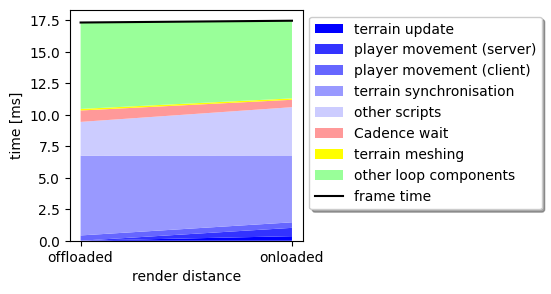

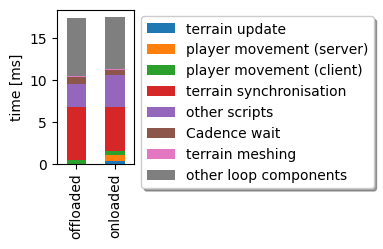

In [ ]:
playerLoopMarkers: list[str] = [
    "OculusRuntime.WaitToBeginFrame",
    "terrainMeshingSys"]

SimSysSubComponents = [
    "terrainTime",
    'GameServer Opencraft.Player.PlayerMovementSystem',
    'GameClient Opencraft.Player.PlayerMovementSystem',
    "GhostUpdateJobCustom"
]

ColNameToLegend = {
    'GameServer Opencraft.Terrain.TerrainGenerationSystem': "terrain spawner",
    'GameServer Opencraft.Terrain.TerrainToSpawn': 'terrain area fetcher',
    'GameServer Opencraft.Terrain.TerrainStructuresSystem': 'terrain structure builder',
    'GameServer Opencraft.Player.PlayerMovementSystem': 'player movement (server)',
    'GameClient Opencraft.Player.PlayerMovementSystem': 'player movement (client)',
    "GhostUpdateJobCustom": "terrain synchronisation",
    "OculusRuntime.WaitToBeginFrame": "Cadence wait",
    "terrainMeshingSys": "terrain meshing",
    "Main Thread": "frame time",
    "other scripts": "other scripts",
    "otherLoopComponents": "other loop components",
    "terrainTime": "terrain update"
}

totalList = (SimSysSubComponents) + playerLoopMarkers
playerLoopMarkers.append("ServerFixedUpdate")
playerLoopMarkers.append("GameClient Unity.Entities.SimulationSystemGroup")

rdStSet, statSets, datapNames, statisticSets, procSet = experimentSet["mulRD"]

ftFrame = ut.concatList(statisticSets, ["offloaded","onloaded"])

ftlFrame = ftFrame.groupby('render distance', as_index=False).apply(lambda x : x.apply(lambda x : x.mean()))

'''
ftlFrame looks something like this:
render dist;  metric 1; metric 2; ..
 3            mean() ; mean() ...
 4            mean() ; mean() ...
 5            mean() ; mean() ...
'''

# to make the stackplot, I would like to group all script columns and show 
# what areas correspond with a specific system
ftlFrame['terrainTime'] = (ftlFrame["GameServer Opencraft.Terrain.TerrainGenerationSystem"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainToSpawn"] + 
    ftlFrame["GameServer Opencraft.Terrain.TerrainStructuresSystem"])

ftlsFrame = ftlFrame[totalList]

otherScriptsCol = (ftlFrame['GameClient Unity.Entities.SimulationSystemGroup'] 
                   + ftlFrame["ServerFixedUpdate"]) - ftlsFrame[SimSysSubComponents].sum(axis=1)

otherLoopCol = ftlFrame['Main Thread'] - ftlFrame[playerLoopMarkers].sum(axis = 1)

ftlsFrame.insert(loc=len(SimSysSubComponents), column="other scripts", value=otherScriptsCol)
ftlsFrame["otherLoopComponents"] = otherLoopCol

# generate colors
# the first areas are all from the scripts, so we need:
colors = list(Color(rgb=(0,0,1)).range_to(Color(rgb=(.8,.8,1)), len(SimSysSubComponents) + 1))

colors.append(Color(rgb=(1,.6,.6)))
colors.append(Color("yellow"))
colors.append(Color(rgb=(.6,1,.6)))

plt.figure(figsize=(3,3))
# ftlFrame.plot.area(x='render distance')


plt.stackplot(ftlFrame['render distance'], ftlsFrame.to_numpy().transpose(),
              colors = list(map(lambda x: Color.get_rgb(x), colors)))

plt.plot(ftlFrame['Main Thread'], c = 'black')


cols = list(ftlsFrame.columns)
cols.append('Main Thread')
legend = plt.legend(list(map(lambda x: ColNameToLegend[x], cols)), loc="upper left", bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)

# pd.DataFrame(ftFrame)[['render distance','Main Thread']].boxplot(by='render distance', showfliers=False)
plt.xlabel("render distance")
plt.ylabel("time [ms]")
plt.savefig("rd-multi-stack.png", bbox_extra_artists = [legend], bbox_inches='tight')
plt.show()

ftlsFrame.plot(kind='bar', stacked= True, figsize=(1,2))
legend = plt.legend(list(map(lambda x: ColNameToLegend[x], cols)), loc="upper left", bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)
plt.xticks(ticks=[0,1], labels=["offloaded","onloaded"])
plt.ylabel("time [ms]")
plt.show()

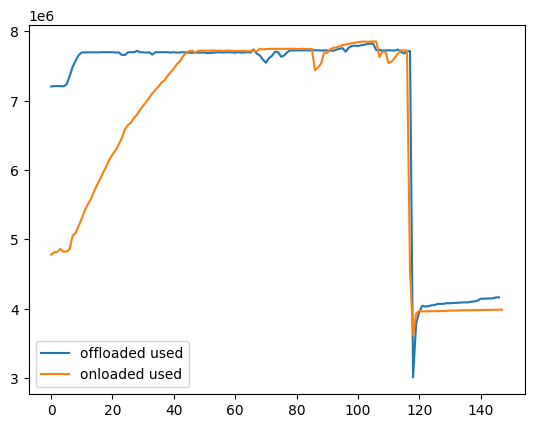

In [ ]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']
#fig, axes = plt.subplots(nrows=len(statSets), ncols = 1)

labels = ["offloaded","onloaded"]
memEntries = list(map(lambda x : x.meminfoEntries ,procSet))

memSet = {}
for i in range(0, len(memEntries)):
    memSet.update({f"{labels[i]} used": list(map(lambda x : x.get_mem_total() - x.get_mem_free(), memEntries[i]))})

memFrame = pd.DataFrame.from_dict(memSet, orient="index").transpose()
memFrame.plot()

# fig.supylabel("CPU usage [%]")
legend = fig.legend(statSets[i].columns, loc="upper left", bbox_to_anchor=(.9, 1),
        ncol=1, fancybox=True, shadow=True)
plt.savefig("CPU-usageMulti.png",bbox_inches="tight")
plt.show()

## Deployment comparison aux

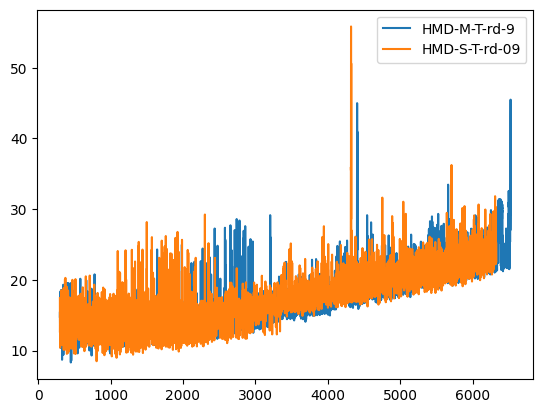

In [ ]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['mulRD']

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ftFrame.plot()
plt.show()

allColList = list(filter(lambda x: x != '', "System Used Memory;GameServer Opencraft.Terrain.TerrainGenerationSystem;GameServer Opencraft.Terrain.TerrainToSpawn;GameServer Opencraft.Terrain.TerrainStructuresSystem;terrainMeshingSys;GameClient Opencraft.Player.PlayerMovementSystem;GameServer Opencraft.Player.PlayerMovementSystem;ServerFixedUpdate;GhostUpdateJobCustom;Idle;OculusRuntime.WaitToBeginFrame;GameClient Unity.Entities.SimulationSystemGroup;".split(";")))

allColList.append("Main Thread")

ftFrame = ut.concatList(statisticSets, ["m","s"])


# ftFrame.plot(column=allColList, showfliers = False, layout=(len(allColList),1), figsize=(5,20))
# for col in allColList:
#     ftFrame[[col, 'render distance']].plot(by="render distance", sharey = True)
# miny, maxy = ut.minmaxY(ftFrame["Main Thread"], 99)
# plt.ylim(0,maxy)

# ftFrame.plot(x='render distance',y='Main Thread')
# plt.show()


# platform Comparison

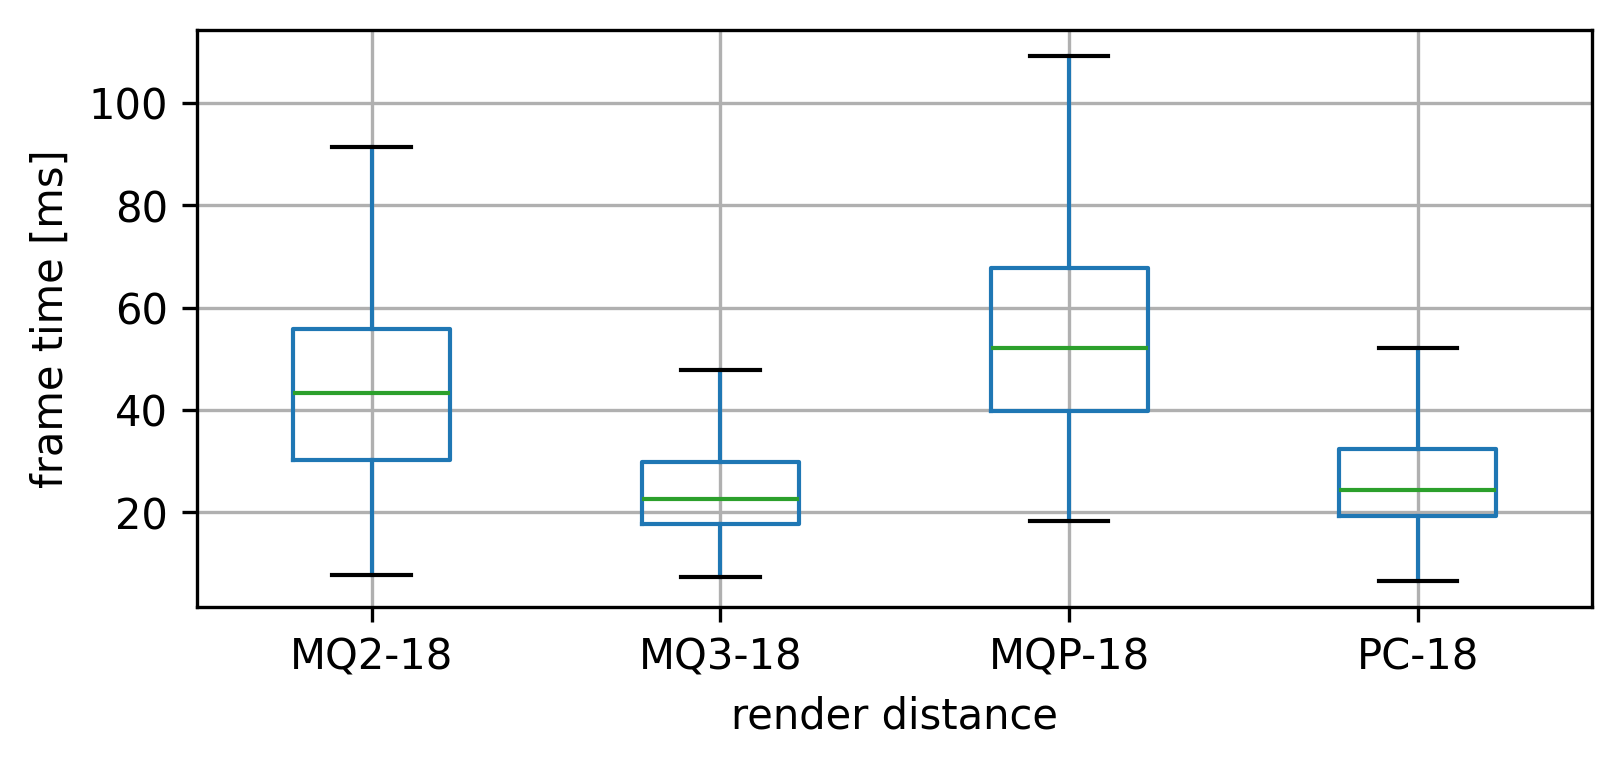

In [45]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet["platfCmp"]
# cpuData(experimentSet, "platfCmp")

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ax = ftFrame.boxplot(showfliers=False, figsize=(6,2.5))

# plt.plot([0,len(ftSet) + 1],[13.33,13.33], color='green')
# plt.plot([0,len(ftSet) + 1],[27.77,27.77], color='red')
plt.ylabel("frame time [ms]")
plt.xlabel("render distance")
plt.savefig("platfCmp.png")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.show()

In [36]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet["platfCmp"]
# cpuData(experimentSet, "platfCmp")

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ax = ftFrame.boxplot(showfliers=False, figsize=(6,2.5))

print(ftFrame.mean().map(lambda x : 23.884615 / x))

MQ2-18    0.546373
MQ3-18    1.000000
MQP-18    0.441629
PC-18     0.907806
dtype: float64


In [ ]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet["platfCmp"]
# cpuData(experimentSet, "platfCmp")

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ftFrame.boxplot(showfliers=False, figsize=(6,2.5))
print(ftFrame.mean())

MQ2-18    43.714816
MQ3-18    23.884615
MQP-18    54.083003
PC-18     26.310251
dtype: float64


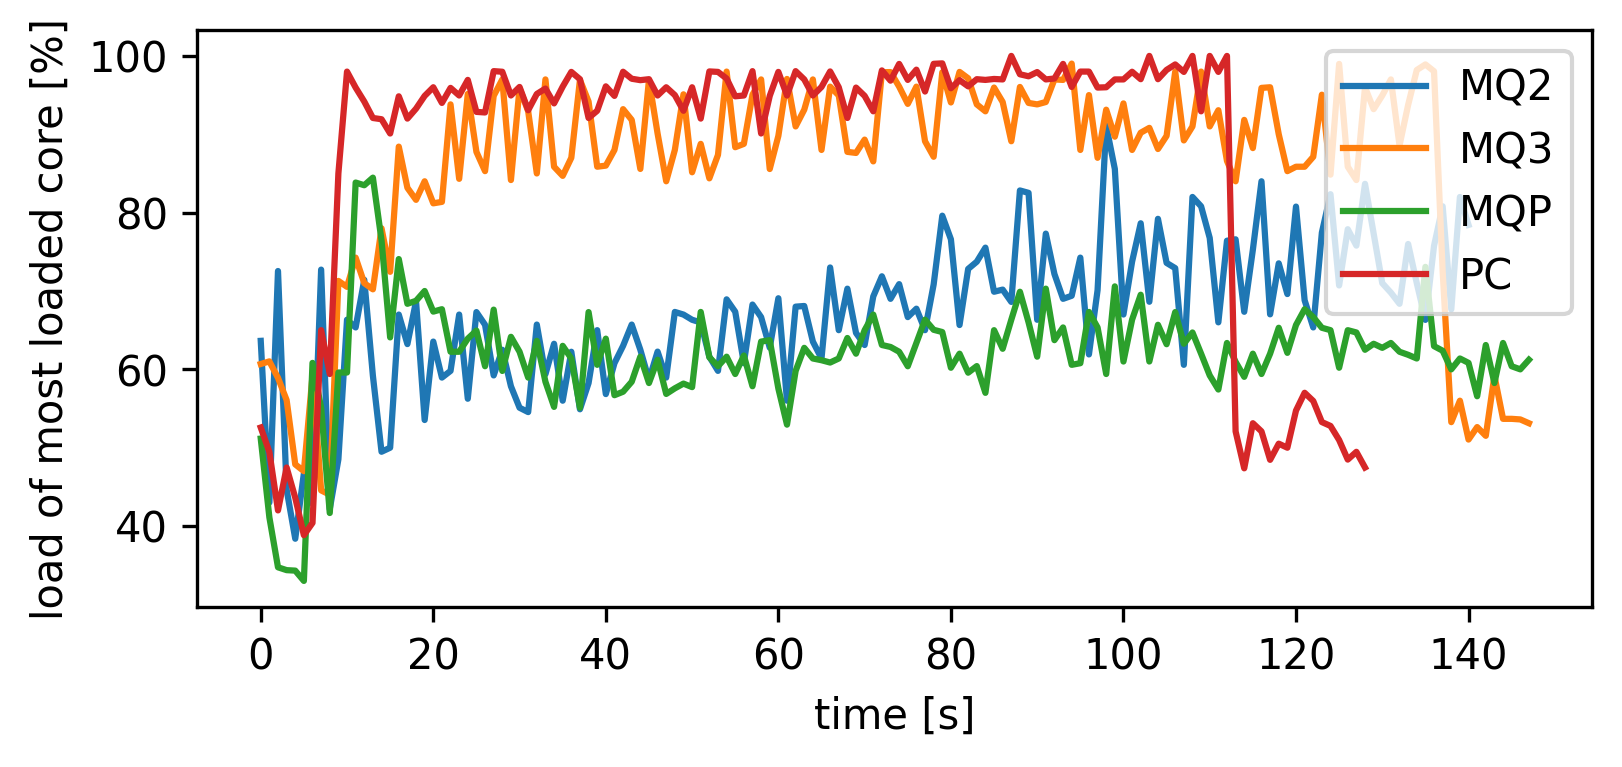

In [35]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet['platfCmp']
    #fig, axes = plt.subplots(nrows=len(statSets), ncols = 1)

largestCols = {}
for i in range(0, len(statSets)):
    largestCols[datapNames[i]] = list(map(lambda x : max(x[1]) ,statSets[i].iterrows()))

largestColsFrame = pd.DataFrame.from_dict(largestCols, orient='index').transpose()

ax = largestColsFrame.plot(figsize=(6,2.5))

legendDict = {
    "MQ2-18" : "MQ2",
    "MQ3-18" : "MQ3",
    "MQP-18" : "MQP",
    "PC-18" : "PC"
}

plt.ylabel("load of most loaded core [%]")
plt.xlabel("time [s]")
plt.legend(list(map(lambda x : legendDict[x], datapNames)))

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.savefig("platfCmp-CPU.png")
plt.show()

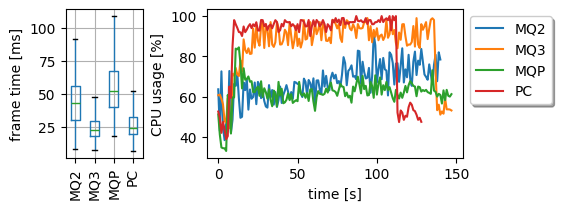

In [ ]:
ftSet, statSets, datapNames, statisticSets, procSet = experimentSet["platfCmp"]
# cpuData(experimentSet, "platfCmp")

gs_kw = dict(width_ratios=[.3, 1], height_ratios=[1])
fig, axd = plt.subplot_mosaic([['left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 2),
                              layout="constrained")
for k, ax in axd.items():
    ax.set_title(f"{k}")

legendDict = {
    "MQ2-18" : "MQ2",
    "MQ3-18" : "MQ3",
    "MQP-18" : "MQP",
    "PC-18" : "PC"
}

frames = list(map(lambda x: pd.DataFrame(x), ftSet))
ftFrame = ut.mergeListAsym(frames, datapNames)
ftFrame.boxplot(showfliers=False, ax=axd['left'])

# plt.plot([0,len(ftSet) + 1],[13.33,13.33], color='green')
# plt.plot([0,len(ftSet) + 1],[27.77,27.77], color='red')
axd['left'].set_ylabel("frame time [ms]")
axd['left'].set_xticks(ticks=[1,2,3,4], labels=list(map(lambda x : legendDict[x], ftFrame.columns)), rotation='vertical')
axd['left'].set_title("")

largestCols = {}
for i in range(0, len(statSets)):
    largestCols[datapNames[i]] = list(map(lambda x : max(x[1]) ,statSets[i].iterrows()))

largestColsFrame = pd.DataFrame.from_dict(largestCols, orient='index').transpose()

ax = largestColsFrame.plot(ax=axd['right'])
axd['right']

legend = plt.legend(list(map(lambda x: legendDict[x], ftFrame.columns)), loc="upper left", bbox_to_anchor=(1, 1),
          ncol=1, fancybox=True, shadow=True)
axd['right'].set_xlabel("time [s]")
axd['right'].set_ylabel("CPU usage [%]")
axd['right'].set_title("")

plt.savefig("platfCmpDual.png")
plt.show()

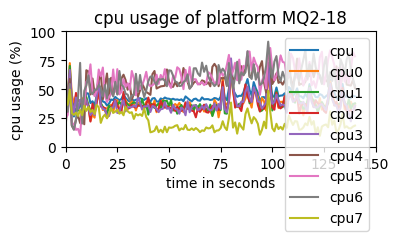

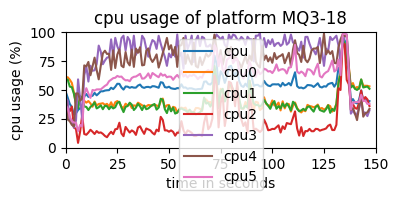

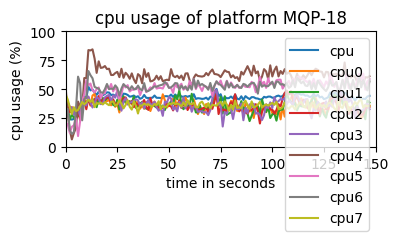

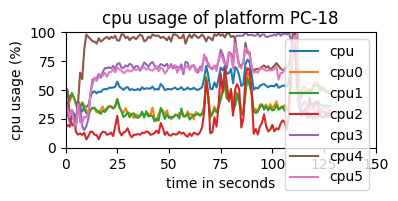

In [ ]:
cpuData(experimentSet, "platfCmp")